# Udacity Data Science Project - CRISP - DM - Looking into Seattle Airbnb Data - Nitin Ramchand Lalwani

## Business Understanding

The seattle Airbnb data set contains data about Airbnb listings in Seattle. There are three csv files in the dataset. The calendar dataset contains data regarding the calendar date and price of a listing in AirBnb in the Seattle region; the Listing dataset contains descriptive data for each registered type of property found in the Seattle region; and finally the Review dataset contains data regarding the reviews left by the guests in the property in the Seattle region.

The questions that I will answer using Data Science techniques in the project are the following:

__1) Price trends:__ <br>
    In particular: <br>
    - Price flucations for each month during the year. <br>
    - Price fluctuations for the Jan 2016 to Jan 2017 different neighbourhoods in Seattle <br>
    - Price fluctuations for the different property types. <br>
    
__2)  Sentiment Analysis and Text Mining of the Reviews__ <br>
    In Particular: <br>
    - Identifying a quantified sentiment metric for an Airbnnb comment based on text mining <br>
    - What is the relationship between reviews and neihbourhoods <br>
    - What is the relationship between reviews and property types <br>
    
__3) Price prediction__ <br>
    Implemeting a Machine Learning algorithm to predict the price for new listings.
   

# Data Understanding

In [167]:
import pandas as pd
import numpy as np
from pprint import pprint
from datetime import datetime

In [168]:
df_Seattle_calendar = pd.read_csv('C:\\Users\\RAMCHAND_N\\Udacity\\Data_Science_Nanodegree\\Intro to Data Science Module\\Seattle\\calendar.csv')
df_Seattle_listings = pd.read_csv('C:\\Users\\RAMCHAND_N\\Udacity\\Data_Science_Nanodegree\\Intro to Data Science Module\\Seattle\\listings.csv')
df_Seattle_reviews = pd.read_csv('C:\\Users\\RAMCHAND_N\\Udacity\\Data_Science_Nanodegree\\Intro to Data Science Module\\Seattle\\reviews.csv')

#### Looking into the Calendar dataset

In [169]:
df_Seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [170]:
df_Seattle_calendar.shape

(1393570, 4)

In [171]:
df_Seattle_calendar.describe(include='all')

,listing_id,date,available,price
count,1.393570e+06,1393570,1393570,934542
unique,NaN,365,2,669
top,NaN,2016-12-10,t,$150.00
freq,NaN,3818,934542,36646
mean,5.550111e+06,NaN,NaN,NaN
std,2.962274e+06,NaN,NaN,NaN
min,3.335000e+03,NaN,NaN,NaN
25%,3.258213e+06,NaN,NaN,NaN
50%,6.118244e+06,NaN,NaN,NaN
75%,8.035212e+06,NaN,NaN,NaN


As we can see in the graph below, it is just the price column that has around 30% of NaN values. 

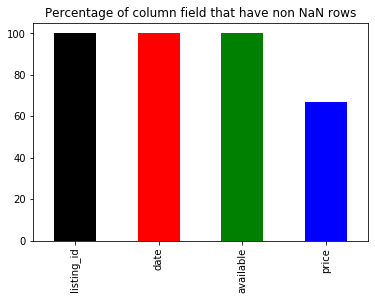

In [172]:
(100*df_Seattle_calendar.notna().mean()).plot(kind='bar', title='Percentage of column field that have non NaN rows', color=['black', 'red', 'green', 'blue', 'cyan']);

Now we will check whether the non filled in values of price occur at the same time that the listing is unavailable. If this is the case then it makes sense since at times that the listing is unavailable, then it is not surprising to not have a price value.

In [173]:
df_Seattle_calendar_nanprices = df_Seattle_calendar[df_Seattle_calendar['price'].isna()]

df_Seattle_calendar_nanprices.describe(include='all')

,listing_id,date,available,price
count,4.590280e+05,459028,459028,0
unique,NaN,365,1,0
top,NaN,2016-01-04,f,NaN
freq,NaN,2083,459028,NaN
mean,6.048085e+06,NaN,NaN,NaN
std,2.872915e+06,NaN,NaN,NaN
min,3.335000e+03,NaN,NaN,NaN
25%,3.961077e+06,NaN,NaN,NaN
50%,6.727846e+06,NaN,NaN,NaN
75%,8.342429e+06,NaN,NaN,NaN


As we can see for all the price values that are NaN's there is only 1 unique availablity value which is false, which means that the listing is __unavailable__. So there is no clean up to do with this regard.

However we do realize that the date available and price columns have strings as values so this will changed to the most conveninent type in the Data Preparation section below.

In [174]:
df_Seattle_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [175]:
type(df_Seattle_calendar.loc[0,'price'])

str

In [176]:
type(df_Seattle_calendar.loc[0,'available'])

str

In [177]:
type(df_Seattle_calendar.loc[0,'date'])

str

We will know check whether all the price lsitings that have a value for price have the $ symbol or not.

In [178]:
num_nonNaN_price_rows = df_Seattle_calendar[df_Seattle_calendar['price'].notna()].shape[0]
num_nonNaN_price_rows

934542

In [179]:
df_Seattle_calendar[df_Seattle_calendar['price'].notna()]['price']

0          $85.00
1          $85.00
9          $85.00
10         $85.00
14         $85.00
            ...  
1393207    $87.00
1393208    $87.00
1393211    $87.00
1393212    $87.00
1393213    $87.00
Name: price, Length: 934542, dtype: object

In [180]:
(df_Seattle_calendar[df_Seattle_calendar['price'].notna()]['price'].str.contains('$').sum() / num_nonNaN_price_rows ) * 100

100.0

We see that 100% all number of non NaN price values containing the $

### Looking into the Listing Dataset

In [181]:
df_Seattle_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [182]:
df_Seattle_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [183]:
df_Seattle_listings.shape

(3818, 92)

Here below the features that have less than 50% of data available out of the 3818 listings

In [184]:
df_Seattle_listings.columns[df_Seattle_listings.isna().mean() > 0.5]

Index(['square_feet', 'monthly_price', 'security_deposit', 'license'], dtype='object')

Since there are so many features, so far we will look into some features in more detail that would seem intuiative to have a strong correlation with the price just to have an intial feel of the data. This process will then be iterated once we go deeper into the project. 

One of the features that first comes up in mind is neighbourhood. As we know in big cities location is considered to be key. Below we filter for the listings which have more than 50 counts per neighbourgood. We see that the one with most data is Capitol Hill. 

In [185]:
df_Seattle_listings['neighbourhood'].value_counts()[df_Seattle_listings['neighbourhood'].value_counts() > 50]

Capitol Hill                 351
Ballard                      213
Belltown                     204
Minor                        192
Queen Anne                   187
Fremont                      148
Wallingford                  143
University District          107
First Hill                   105
Stevens                       98
North Beacon Hill             95
Lower Queen Anne              83
Central Business District     81
Greenwood                     79
Columbia City                 61
Ravenna                       59
Phinney Ridge                 56
Magnolia                      55
Green Lake                    52
Name: neighbourhood, dtype: int64

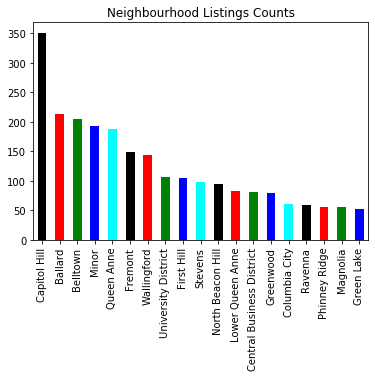

In [186]:
(df_Seattle_listings['neighbourhood'].value_counts()[df_Seattle_listings['neighbourhood'].value_counts() > 50]).plot(kind='bar', title='Neighbourhood Listings Counts', color=['black', 'red', 'green', 'blue', 'cyan']);

In [187]:
df_Seattle_listings['review_scores_value'].value_counts()

10.0    1775
9.0     1137
8.0      190
7.0       38
6.0       16
4.0        4
5.0        1
2.0        1
Name: review_scores_value, dtype: int64

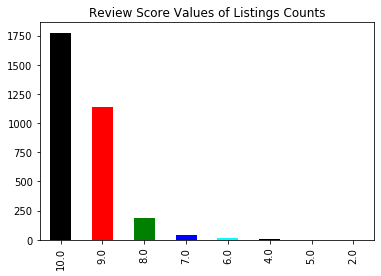

In [188]:
(df_Seattle_listings['review_scores_value'].value_counts()).plot(kind='bar', title='Review Score Values of Listings Counts', color=['black', 'red', 'green', 'blue', 'cyan']);

In [189]:
df_Seattle_listings['review_scores_rating'].value_counts()

100.0    781
98.0     292
96.0     278
97.0     266
95.0     260
94.0     198
93.0     184
99.0     146
90.0     138
80.0     111
92.0     105
91.0      97
87.0      55
89.0      53
88.0      47
85.0      24
84.0      23
86.0      17
83.0      13
60.0      12
82.0      10
70.0       8
73.0       7
76.0       5
72.0       4
78.0       4
77.0       4
40.0       4
75.0       3
71.0       3
81.0       3
68.0       2
74.0       2
67.0       2
79.0       2
66.0       2
64.0       1
20.0       1
53.0       1
65.0       1
55.0       1
57.0       1
Name: review_scores_rating, dtype: int64

In [190]:
df_Seattle_listings['amenities'].value_counts()

{}                                                                                                                                                                                                                                                                                                                            45
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                                        11
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo,"24-Hour Check-in",Hangers,"Hair Dryer",Iron}                          10
{TV,"Cable TV",Internet,"Wireless Int

In [191]:
df_Seattle_listings['instant_bookable'].value_counts()

f    3227
t     591
Name: instant_bookable, dtype: int64

In [192]:
df_Seattle_listings['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

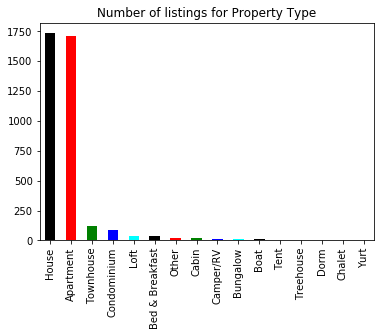

In [193]:
(df_Seattle_listings['property_type'].value_counts()).plot(kind='bar', title='Number of listings for Property Type', color=['black', 'red', 'green', 'blue', 'cyan']);

In [194]:
df_Seattle_listings['experiences_offered'].value_counts()

none    3818
Name: experiences_offered, dtype: int64

We already see below that for the host_location column there are many irregularities and some work can be done there to harmonize the names. 

In [195]:
df_Seattle_listings['host_location'].value_counts()

Seattle, Washington, United States          3259
US                                           246
Spokane, Washington, United States            41
Kent, Washington, United States               34
Los Angeles, California, United States        13
                                            ... 
West New York, New Jersey, United States       1
Newcastle, Washington, United States           1
Kenilworth, Illinois, United States            1
Vashon Island, Seattle, WA                     1
Gig Harbor, Washington, United States          1
Name: host_location, Length: 120, dtype: int64

In [196]:
df_Seattle_listings['host_response_rate'].value_counts()

100%    2371
90%      165
80%      104
99%       78
88%       66
50%       52
94%       46
67%       41
89%       32
75%       32
86%       30
96%       28
98%       28
70%       25
97%       21
60%       20
83%       20
93%       18
92%       18
33%       14
40%       12
63%       11
71%        8
95%        8
78%        8
91%        5
43%        4
25%        3
64%        3
76%        3
87%        3
58%        2
17%        2
82%        2
57%        2
30%        1
81%        1
68%        1
38%        1
69%        1
31%        1
56%        1
55%        1
53%        1
65%        1
Name: host_response_rate, dtype: int64

In [197]:
df_Seattle_listings['host_response_time'].value_counts()

within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

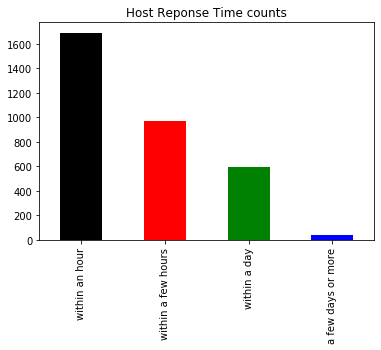

In [198]:
(df_Seattle_listings['host_response_time'].value_counts()).plot(kind='bar', title='Host Reponse Time counts', color=['black', 'red', 'green', 'blue', 'cyan']);

In [199]:
df_Seattle_listings['number_of_reviews'].value_counts() 

0      627
1      310
2      224
4      160
3      157
      ... 
244      1
270      1
278      1
294      1
353      1
Name: number_of_reviews, Length: 195, dtype: int64

In [200]:
df_Seattle_listings['cancellation_policy'].value_counts()

strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

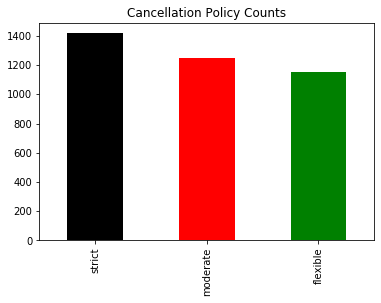

In [201]:
(df_Seattle_listings['cancellation_policy'].value_counts()).plot(kind='bar', title='Cancellation Policy Counts', color=['black', 'red', 'green', 'blue', 'cyan']);

In [202]:
df_Seattle_listings['maximum_nights'].value_counts()

1125    2453
30       183
365      148
14       123
7        108
        ... 
500        1
234        1
260        1
330        1
1825       1
Name: maximum_nights, Length: 68, dtype: int64

In [203]:
df_Seattle_listings['minimum_nights'].value_counts()

1       1610
2       1423
3        480
4        122
5         67
7         50
6         16
14        16
20        11
30         6
10         5
13         2
1000       1
29         1
28         1
26         1
11         1
12         1
8          1
15         1
21         1
31         1
Name: minimum_nights, dtype: int64

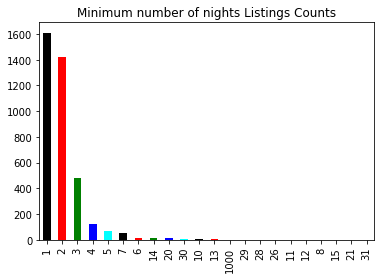

In [204]:
(df_Seattle_listings['minimum_nights'].value_counts()).plot(kind='bar', title='Minimum number of nights Listings Counts', color=['black', 'red', 'green', 'blue', 'cyan']);

In [205]:
df_Seattle_listings['room_type'].value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

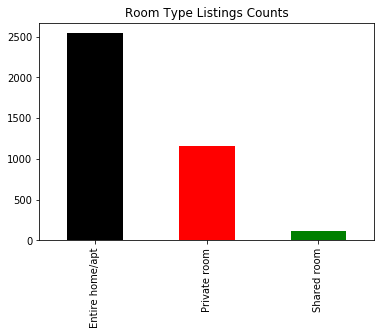

In [206]:
(df_Seattle_listings['room_type'].value_counts()).plot(kind='bar', title='Room Type Listings Counts', color=['black', 'red', 'green', 'blue', 'cyan']);

### Looking into the Review Dataset

In [207]:
df_Seattle_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [208]:
df_Seattle_reviews.shape

(84849, 6)

In [209]:
df_Seattle_reviews.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

# Data Preparation

__Question 1: Price trends:__ <br>
_Price flucations for each month during the year._ <br>

In [210]:
df_Seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [211]:
df_Seattle_calendar['date'] = pd.to_datetime(df_Seattle_calendar['date'])

In [212]:
df_Seattle_calendar['price'] = pd.to_numeric(df_Seattle_calendar['price'].str.replace('\$|,',''))

In [213]:
df_Seattle_calendar_nonnullvalues = df_Seattle_calendar[df_Seattle_calendar['available'] == 't']

In [214]:
df_Seattle_mean_price_month = df_Seattle_calendar_nonnullvalues.groupby(pd.Grouper(key='date', freq='1M')).mean()

In [215]:
df_Seattle_mean_price_month

,listing_id,price
date,,
2016-01-31,5.403012e+06,121.568409
2016-02-29,5.416562e+06,124.293927
2016-03-31,5.383965e+06,128.644488
2016-04-30,5.244016e+06,135.097005
2016-05-31,5.234380e+06,139.538183
2016-06-30,5.170853e+06,147.473137
2016-07-31,5.200952e+06,152.094150
2016-08-31,5.240480e+06,150.656594
2016-09-30,5.279361e+06,143.255949


As we can see in the bar chart below, in average the priciest months are the summer months.

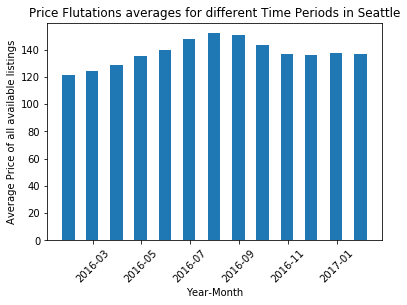

In [216]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.bar(x=df_Seattle_mean_price_month.index, height=df_Seattle_mean_price_month['price'], width = 15.5)
#plt.gcf().autofmt_xdate()
#ax.set_xticklabels(df_Seattle_mean_price_month.index, rotation=45)
plt.xticks(rotation=45)
plt.title('Price Flutations averages for different Time Periods in Seattle')
plt.xlabel('Year-Month')
plt.ylabel('Average Price of all available listings')
plt.show()


It makes sense that the most costly months are the ones during the summer since the weather is nicer and the lowest season cold month of January has the lowest average price. 

_Price fluctuations for the Jan 2016 to Jan 2017 different neighbourhoods in Seattle_

In [217]:
df_Seattle_merge_listings = df_Seattle_calendar.merge(df_Seattle_listings[['id','neighbourhood', 'property_type']], left_on='listing_id', right_on='id', how='left')

In [218]:
df_Seattle_merge_listings = df_Seattle_merge_listings[df_Seattle_merge_listings['available'] == 't']

In [219]:
df_Seattle_merge_listings.head()

,listing_id,date,available,price,id,neighbourhood,property_type
0,241032,2016-01-04,t,85.0,241032,Queen Anne,Apartment
1,241032,2016-01-05,t,85.0,241032,Queen Anne,Apartment
9,241032,2016-01-13,t,85.0,241032,Queen Anne,Apartment
10,241032,2016-01-14,t,85.0,241032,Queen Anne,Apartment
14,241032,2016-01-18,t,85.0,241032,Queen Anne,Apartment


In [220]:
df_Seattle_mean_price_neighbourhood = df_Seattle_merge_listings.groupby('neighbourhood').mean()

In [221]:
df_Seattle_mean_price_neighbourhood.head()

,listing_id,price,id
neighbourhood,,,
Alki,5.373617e+06,226.410733,5.373617e+06
Arbor Heights,3.290610e+06,127.230769,3.290610e+06
Atlantic,4.858098e+06,125.779920,4.858098e+06
Ballard,4.810632e+06,126.249822,4.810632e+06
Belltown,4.901600e+06,207.985532,4.901600e+06


In [222]:
df_Seattle_mean_price_neighbourhood_sorted = df_Seattle_mean_price_neighbourhood.sort_values(by='price', ascending = False)

In [223]:
df_Seattle_mean_price_neighbourhood_sorted

,listing_id,price,id
neighbourhood,,,
Fairmount Park,6.920800e+05,370.000000,6.920800e+05
Portage Bay,5.430984e+06,250.885285,5.430984e+06
Industrial District,3.391297e+06,245.875441,3.391297e+06
Windermere,5.774818e+06,227.516092,5.774818e+06
Alki,5.373617e+06,226.410733,5.373617e+06
...,...,...,...
Holly Park,6.124913e+06,78.184594,6.124913e+06
Georgetown,4.109944e+06,78.025107,4.109944e+06
Riverview,4.137325e+06,77.346276,4.137325e+06


In [224]:
df_Seattle_mean_price_neighbourhood_sorted_mt_150 = df_Seattle_mean_price_neighbourhood_sorted[df_Seattle_mean_price_neighbourhood_sorted['price'] >150]

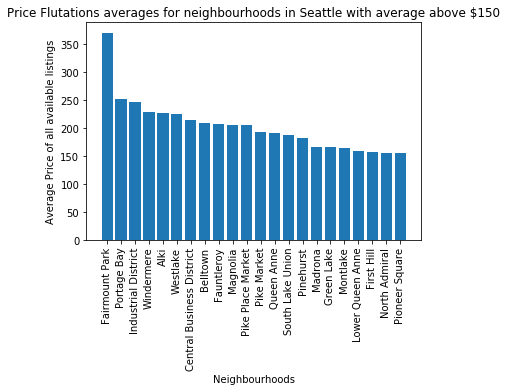

In [225]:
plt.bar(x=df_Seattle_mean_price_neighbourhood_sorted_mt_150.index, height=df_Seattle_mean_price_neighbourhood_sorted_mt_150['price'])
plt.xticks(rotation=90)
plt.title('Price Flutations averages for neighbourhoods in Seattle with average above $150')
plt.xlabel('Neighbourhoods')
plt.ylabel('Average Price of all available listings')
plt.show()

In [226]:
df_Seattle_merge_listings[df_Seattle_merge_listings['neighbourhood'] == 'Fairmount Park']['price']

679995    370.0
679996    370.0
679997    370.0
679998    370.0
679999    370.0
          ...  
680355    370.0
680356    370.0
680357    370.0
680358    370.0
680359    370.0
Name: price, Length: 365, dtype: float64

In [227]:
df_Seattle_listings[df_Seattle_listings['neighbourhood'] == 'Fairmount Park']['price']

1863    $370.00
Name: price, dtype: object

In [228]:
df_Seattle_listings[df_Seattle_listings['neighbourhood'] == 'Portage Bay']['price']

1105    $150.00
1115    $300.00
2514    $120.00
2515    $525.00
2516     $99.00
2517     $90.00
2518    $750.00
2519    $250.00
2521    $380.00
2522    $130.00
2524    $257.00
2525     $90.00
2526    $160.00
3814     $79.00
Name: price, dtype: object

The price for the Fairmont Park neighbourhood is the highest because as we see there is only one listings in this neighbourhood as has a price of \$370 for all days of the year. So maybe for this analysis we have to have this in mind. We see for another neighourood, the second most costly one has several listings. 

_Price fluctuations for the different property types_

In [229]:
df_Seattle_mean_price_property_type = df_Seattle_merge_listings.groupby('property_type').mean()

In [230]:
df_Seattle_mean_price_property_type_sorted = df_Seattle_mean_price_property_type.sort_values(by='price', ascending = False)
df_Seattle_mean_price_property_type_sorted

,listing_id,price,id
property_type,,,
Boat,4.424096e+06,330.618901,4.424096e+06
Condominium,7.537962e+06,169.646416,7.537962e+06
Apartment,5.476826e+06,139.285106,5.476826e+06
House,4.941563e+06,136.627935,4.941563e+06
Loft,5.529949e+06,133.465979,5.529949e+06
Townhouse,7.240591e+06,133.011563,7.240591e+06
Camper/RV,5.817348e+06,126.931055,5.817348e+06
Bungalow,8.278973e+06,124.330813,8.278973e+06
Bed & Breakfast,5.512862e+06,116.048976,5.512862e+06


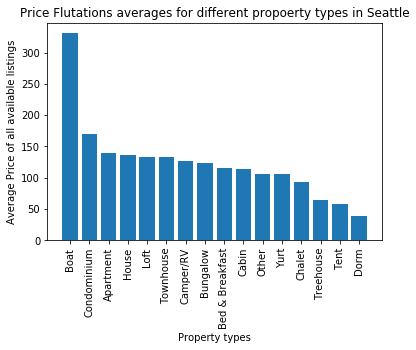

In [231]:
plt.bar(x=df_Seattle_mean_price_property_type_sorted.index, height=df_Seattle_mean_price_property_type_sorted['price'])
plt.xticks(rotation=90)
plt.title('Price Flutations averages for different propoerty types in Seattle')
plt.xlabel('Property types')
plt.ylabel('Average Price of all available listings')
plt.show()

As we saw before that apartment and house are the property types that dominate the listings on Airbnb however the boat property type has the largest average of price.

In [232]:
df_Seattle_merge_listings.head()

,listing_id,date,available,price,id,neighbourhood,property_type
0,241032,2016-01-04,t,85.0,241032,Queen Anne,Apartment
1,241032,2016-01-05,t,85.0,241032,Queen Anne,Apartment
9,241032,2016-01-13,t,85.0,241032,Queen Anne,Apartment
10,241032,2016-01-14,t,85.0,241032,Queen Anne,Apartment
14,241032,2016-01-18,t,85.0,241032,Queen Anne,Apartment


There are in total 2275 available price entries for boat however we will see below that they belong to just 8 listings in the listings dataset.

In [233]:
df_Seattle_merge_listings[df_Seattle_merge_listings['property_type'] == 'Boat'].shape

(2275, 7)

In [234]:
df_Seattle_listings[df_Seattle_listings['property_type'] == 'Boat']['price']

212      $85.00
319     $680.00
561     $150.00
565     $775.00
567     $249.00
1917     $95.00
3263    $150.00
3303     $75.00
Name: price, dtype: object

_Combining the property type and the neighbourood information_ 

In [235]:
df_Seattle_sorted_neighbourhood_and_property_type = df_Seattle_merge_listings.groupby(['neighbourhood','property_type']).mean().sort_values('price', ascending = False)

In [236]:
df_Seattle_sorted_neighbourhood_and_property_type

,,listing_id,price,id
neighbourhood,property_type,,,
Westlake,Boat,5.276950e+06,461.641484,5.276950e+06
Fairmount Park,House,6.920800e+05,370.000000,6.920800e+05
Minor,Loft,7.149769e+06,351.594059,7.149769e+06
Green Lake,Townhouse,9.868607e+06,325.000000,9.868607e+06
Portage Bay,House,5.176950e+06,324.379504,5.176950e+06
...,...,...,...,...
University District,Other,9.611409e+06,43.125000,9.611409e+06
International District,Other,5.031334e+06,41.424581,5.031334e+06
Haller Lake,Townhouse,9.220485e+06,40.220339,9.220485e+06


__2)  Sentiment Analysis and Text Mining of the Reviews__

_Identifying a quantified metric for an Airbnnb comment based on text mining_

In [237]:
df_Seattle_reviews.shape

(84849, 6)

In [238]:
df_Seattle_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [239]:
import nltk
import re
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

We see that the comments column has string type of rows which is what we want.

In [240]:
type(df_Seattle_reviews.loc[0,'comments'])

str

We also see that there are 18 columns with null values in the comments so we remove these for our analysis in the following commands

In [241]:
df_Seattle_reviews['comments'].isna().sum()

18

In [242]:
df_Seattle_reviews_no_nulls = df_Seattle_reviews[df_Seattle_reviews['comments'].notna()]

Special characters are non-alphabetic and non-numeric values such as {!,@#$%^ *()~;:/<>|+_-[]?}. Dealing with numbers is straightforward but special characters can be sometimes tricky. During tokenization, special characters create their own tokens and again not helpful for any algorithm, likewise, numbers.

In [243]:
df_Seattle_reviews_no_nulls['comments_no_special_charac'] = df_Seattle_reviews['comments'].replace(r'[^\w\s]','', regex=True)

C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [244]:
df_Seattle_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [245]:
df_Seattle_reviews_no_nulls.shape

(84831, 7)

In [246]:
df_Seattle_reviews_no_nulls.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_no_special_charac
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,Cute and cozy place Perfect location to everyt...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",Very spacious apartment and in a great neighbo...
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,Kelly was a great host and very accommodating ...


In [247]:
stop = stopwords.words('english')
df_Seattle_reviews_no_nulls['comments_no_stopwords_no_special_charac'] = df_Seattle_reviews_no_nulls['comments_no_special_charac'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [248]:
df_Seattle_reviews_no_nulls.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_no_special_charac,comments_no_stopwords_no_special_charac
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,Cute and cozy place Perfect location to everyt...,Cute cozy place Perfect location everything
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,Kelly has a great room in a very central locat...,Kelly great room central location Beautiful bu...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",Very spacious apartment and in a great neighbo...,Very spacious apartment great neighborhood Thi...
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,Close to Seattle Center and all it has to offe...,Close Seattle Center offer ballet theater muse...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,Kelly was a great host and very accommodating ...,Kelly great host accommodating great neighborh...


Now we conduct stemming of the words.

In [249]:
st = PorterStemmer()
df_Seattle_reviews_no_nulls['comments_no_stopwords_no_special_charac_stemmed']  = df_Seattle_reviews_no_nulls['comments_no_stopwords_no_special_charac'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [250]:
df_Seattle_reviews_no_nulls.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_no_special_charac,comments_no_stopwords_no_special_charac,comments_no_stopwords_no_special_charac_stemmed
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,Cute and cozy place Perfect location to everyt...,Cute cozy place Perfect location everything,cute cozi place perfect locat everyth
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,Kelly has a great room in a very central locat...,Kelly great room central location Beautiful bu...,kelli great room central locat beauti build ar...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",Very spacious apartment and in a great neighbo...,Very spacious apartment great neighborhood Thi...,veri spaciou apart great neighborhood thi kind...
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,Close to Seattle Center and all it has to offe...,Close Seattle Center offer ballet theater muse...,close seattl center offer ballet theater museu...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,Kelly was a great host and very accommodating ...,Kelly great host accommodating great neighborh...,kelli great host accommod great neighborhood s...


Now we define a function that is taken from the TextBlob library in order to give a sentiment score.

In [251]:
def senti(x):
    return TextBlob(x).sentiment  

In [252]:
df_Seattle_reviews_no_nulls['sentiment_score'] = df_Seattle_reviews_no_nulls['comments_no_stopwords_no_special_charac_stemmed'].apply(senti)

C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


We realize that the sentiment scorer generates two values in the column. The first one is the polarity score which defines wheteher the comment analyzed is positive or negative with a magnitude. The second score is a subjectivity score, which is a score defining how subjective is the commment.

In [253]:
df_Seattle_reviews_no_nulls.shape

(84831, 10)

In [254]:
polarity_scores = []
subjectivity_scores = []
for polarity, subjectivity in df_Seattle_reviews_no_nulls.sentiment_score:
    polarity_scores.append(polarity)
    subjectivity_scores.append(subjectivity)

In [255]:
print ('The total number of positive polarity scores out of a total of', df_Seattle_reviews_no_nulls.shape[0], 'are', sum(x > 0 for x in polarity_scores))
print ('The total number of negative polarity scores out of a total of', df_Seattle_reviews_no_nulls.shape[0], 'are', sum(x < 0 for x in polarity_scores))
print ('The total number of neutral polarity scores out of a total of', df_Seattle_reviews_no_nulls.shape[0], 'are', sum(x == 0 for x in polarity_scores))

The total number of positive polarity scores out of a total of 84831 are 79607
The total number of negative polarity scores out of a total of 84831 are 992
The total number of neutral polarity scores out of a total of 84831 are 4232


In [256]:
print ('The total number of positive subjectivity scores out of a total of', df_Seattle_reviews_no_nulls.shape[0], 'are', sum(x > 0 for x in subjectivity_scores))
print ('The total number of negative subjectivity scores out of a total of', df_Seattle_reviews_no_nulls.shape[0], 'are', sum(x < 0 for x in subjectivity_scores))
print ('The total number of neutral subjectivity scores out of a total of', df_Seattle_reviews_no_nulls.shape[0], 'are', sum(x == 0 for x in subjectivity_scores))

The total number of positive subjectivity scores out of a total of 84831 are 81285
The total number of negative subjectivity scores out of a total of 84831 are 0
The total number of neutral subjectivity scores out of a total of 84831 are 3546


In [257]:
df_Seattle_reviews_no_nulls[['polarity_score', 'subjectivity_score']] = pd.DataFrame(df_Seattle_reviews_no_nulls['sentiment_score'].tolist(), index = df_Seattle_reviews_no_nulls.index)

C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [258]:
df_Seattle_reviews_no_nulls.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,comments_no_special_charac,comments_no_stopwords_no_special_charac,comments_no_stopwords_no_special_charac_stemmed,sentiment_score,polarity_score,subjectivity_score
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,Cute and cozy place Perfect location to everyt...,Cute cozy place Perfect location everything,cute cozi place perfect locat everyth,"(0.75, 1.0)",0.750000,1.000000
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,Kelly has a great room in a very central locat...,Kelly great room central location Beautiful bu...,kelli great room central locat beauti build ar...,"(0.22321428571428573, 0.4928571428571429)",0.223214,0.492857
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",Very spacious apartment and in a great neighbo...,Very spacious apartment great neighborhood Thi...,veri spaciou apart great neighborhood thi kind...,"(0.7, 0.825)",0.700000,0.825000
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,Close to Seattle Center and all it has to offe...,Close Seattle Center offer ballet theater muse...,close seattl center offer ballet theater museu...,"(0.25, 0.35)",0.250000,0.350000
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,Kelly was a great host and very accommodating ...,Kelly great host accommodating great neighborh...,kelli great host accommod great neighborhood s...,"(0.5148148148148148, 0.5518518518518518)",0.514815,0.551852


_What is the relationship between reviews and neihbourhoods_

Lets merge the listings dataframe to have the neighbourood for each 

In [259]:
df_Seattle_listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.30
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.00
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN


In [260]:
df_Seattle_nonulls_merged = df_Seattle_reviews_no_nulls.merge(df_Seattle_listings[['id','neighbourhood', 'property_type']], left_on='listing_id', right_on='id', how='left')

In [261]:
df_Seattle_nonulls_merged.head()

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,comments_no_special_charac,comments_no_stopwords_no_special_charac,comments_no_stopwords_no_special_charac_stemmed,sentiment_score,polarity_score,subjectivity_score,id_y,neighbourhood,property_type
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,Cute and cozy place Perfect location to everyt...,Cute cozy place Perfect location everything,cute cozi place perfect locat everyth,"(0.75, 1.0)",0.750000,1.000000,7202016,Lower Queen Anne,Apartment
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,Kelly has a great room in a very central locat...,Kelly great room central location Beautiful bu...,kelli great room central locat beauti build ar...,"(0.22321428571428573, 0.4928571428571429)",0.223214,0.492857,7202016,Lower Queen Anne,Apartment
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",Very spacious apartment and in a great neighbo...,Very spacious apartment great neighborhood Thi...,veri spaciou apart great neighborhood thi kind...,"(0.7, 0.825)",0.700000,0.825000,7202016,Lower Queen Anne,Apartment
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,Close to Seattle Center and all it has to offe...,Close Seattle Center offer ballet theater muse...,close seattl center offer ballet theater museu...,"(0.25, 0.35)",0.250000,0.350000,7202016,Lower Queen Anne,Apartment
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,Kelly was a great host and very accommodating ...,Kelly great host accommodating great neighborh...,kelli great host accommod great neighborhood s...,"(0.5148148148148148, 0.5518518518518518)",0.514815,0.551852,7202016,Lower Queen Anne,Apartment


We see there are 4658 rows without a neighbourhood and none without a property type.

In [262]:
df_Seattle_nonulls_merged['neighbourhood'].isnull().sum()

4658

In [263]:
df_Seattle_nonulls_merged['property_type'].isnull().sum()

0

In [264]:
df_Seattle_sorted_polarity_grouped_neighbourhood = df_Seattle_nonulls_merged.groupby('neighbourhood').mean()[['polarity_score','subjectivity_score']].sort_values(by='polarity_score', ascending=False)

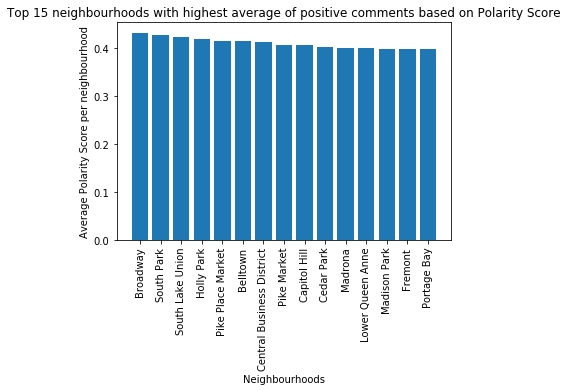

In [265]:
plt.bar(x=df_Seattle_sorted_polarity_grouped_neighbourhood[:15].index, height=df_Seattle_sorted_polarity_grouped_neighbourhood['polarity_score'][:15])
plt.xticks(rotation=90)
plt.title('Top 15 neighbourhoods with highest average of positive comments based on Polarity Score')
plt.xlabel('Neighbourhoods')
plt.ylabel('Average Polarity Score per neighbourhood')
plt.show()

We see that Broadway is the neighbourhood with the best reviews.

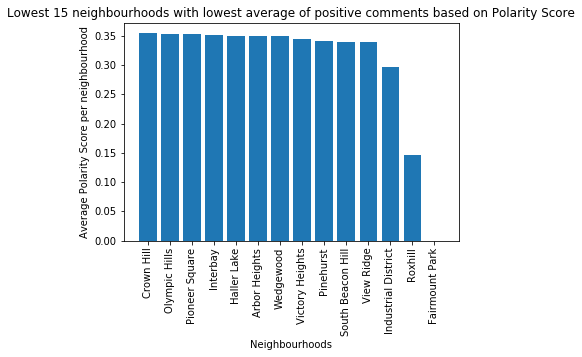

In [266]:
plt.bar(x=df_Seattle_sorted_polarity_grouped_neighbourhood[66:].index, height=df_Seattle_sorted_polarity_grouped_neighbourhood['polarity_score'][66:])
plt.xticks(rotation=90)
plt.title('Lowest 15 neighbourhoods with lowest average of positive comments based on Polarity Score')
plt.xlabel('Neighbourhoods')
plt.ylabel('Average Polarity Score per neighbourhood')
plt.show()

Despite the neighbourhood with the worst avergae showing up as Fairmount Park we will see below that it is because there is  only one automatic comment left for the only 1 listing available in Fairmount Park which is of a cancellation comment. 

In [267]:
df_Seattle_nonulls_merged[df_Seattle_nonulls_merged['neighbourhood']== 'Fairmount Park']

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,comments_no_special_charac,comments_no_stopwords_no_special_charac,comments_no_stopwords_no_special_charac_stemmed,sentiment_score,polarity_score,subjectivity_score,id_y,neighbourhood,property_type
7581,692080,25895964,2015-01-28,12059638,Skylar,The reservation was canceled 170 days before a...,The reservation was canceled 170 days before a...,The reservation canceled 170 days arrival This...,the reserv cancel 170 day arriv thi autom post,"(0.0, 0.0)",0.0,0.0,692080,Fairmount Park,House


_What is the relationship between reviews and property types_

In [268]:
df_Seattle_sorted_polarity_grouped_property_type = df_Seattle_nonulls_merged.groupby('property_type').mean()[['polarity_score','subjectivity_score']].sort_values(by='polarity_score', ascending=False)
df_Seattle_sorted_polarity_grouped_property_type

,polarity_score,subjectivity_score
property_type,,
Bungalow,0.415010,0.588299
Condominium,0.414421,0.581005
Townhouse,0.399702,0.577343
Apartment,0.395302,0.571481
Loft,0.389399,0.569563
House,0.383337,0.563635
Cabin,0.382399,0.566839
Tent,0.375698,0.554929
Other,0.368802,0.552248


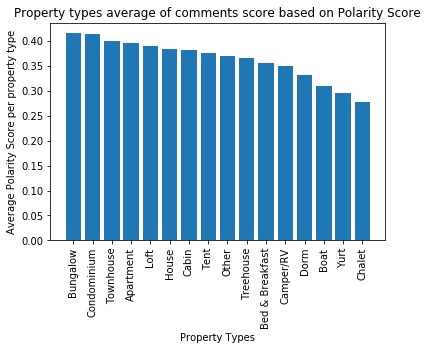

In [269]:
plt.bar(x=df_Seattle_sorted_polarity_grouped_property_type.index, height=df_Seattle_sorted_polarity_grouped_property_type['polarity_score'])
plt.xticks(rotation=90)
plt.title('Property types average of comments score based on Polarity Score')
plt.xlabel('Property Types')
plt.ylabel('Average Polarity Score per property type')
plt.show()

In [270]:
df_Seattle_nonulls_merged[df_Seattle_nonulls_merged['property_type']== 'Bungalow'].head()

,listing_id,id_x,date,reviewer_id,reviewer_name,comments,comments_no_special_charac,comments_no_stopwords_no_special_charac,comments_no_stopwords_no_special_charac_stemmed,sentiment_score,polarity_score,subjectivity_score,id_y,neighbourhood,property_type
1557,7275464,38459696,2015-07-15,35664887,Jay,I just got a chance to catch up on things afte...,I just got a chance to catch up on things afte...,I got chance catch things week attending event...,I got chanc catch thing week attend event seat...,"(0.2518518518518518, 0.43518518518518523)",0.251852,0.435185,7275464,Stevens,Bungalow
1558,7275464,38663857,2015-07-17,30851696,David,Great little studio in a quiet neighborhood. V...,Great little studio in a quiet neighborhood Ve...,Great little studio quiet neighborhood Very ni...,great littl studio quiet neighborhood veri nic...,"(0.39999999999999997, 0.5958333333333332)",0.400000,0.595833,7275464,Stevens,Bungalow
1559,7275464,44147216,2015-08-24,501330,Aaron,Perfect visit to Seattle. The Studio is lovely...,Perfect visit to Seattle The Studio is lovely ...,Perfect visit Seattle The Studio lovely bright...,perfect visit seattl the studio love bright cl...,"(0.6666666666666666, 0.8142857142857142)",0.666667,0.814286,7275464,Stevens,Bungalow
1560,7275464,45293371,2015-09-01,29702757,Brian,Great little studio super close to downtown. ...,Great little studio super close to downtown L...,Great little studio super close downtown Loved...,great littl studio super close downtown love c...,"(0.3466666666666666, 0.7233333333333334)",0.346667,0.723333,7275464,Stevens,Bungalow
1561,7275464,47164953,2015-09-16,10285131,David,Awesome private studio in Seattle's Capitol Hi...,Awesome private studio in Seattles Capitol Hil...,Awesome private studio Seattles Capitol Hill n...,awesom privat studio seattl capitol hill neigh...,"(0.27999999999999997, 0.5066666666666667)",0.280000,0.506667,7275464,Stevens,Bungalow


We see that the bungalow type has the best average and just looking at a few comments, words such as "super", "great" and "awesome" show up so this is a good sign for out sentiment analysis.

__3) Price prediction__

To answer the question of whether we can develop an algorithm to predict a price for a listing. This will be useful for Airbnb to target the right market based on specific features.  

Fo this we have to clean up quite thoroughly the listings dataset as we saw in the previous section and we will have to dig into each and every feature.

In [271]:
df_Seattle_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [272]:
df_Seattle_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

Lets drop the first set of columns that are clearly not linked to price such as id and other features.

In [273]:
drop_not_price_correlated_columns = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'thumbnail_url', 'medium_url',
        'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_thumbnail_url', 'host_verifications', 'street', 'country', 'latitude', 'longitude', 'weekly_price', 'monthly_price','calendar_last_scraped', 
        'first_review', 'last_review', 'jurisdiction_names']
len(drop_not_price_correlated_columns)

22

In [274]:
df_Seattle_listings.drop(drop_not_price_correlated_columns, axis=1, inplace = True)
df_Seattle_listings.shape

(3818, 70)

In [275]:
numeric_cols = df_Seattle_listings.select_dtypes(include = 'number').columns
for numeric_col in numeric_cols:
    print (numeric_col, 'has the following percentage of null values', (df_Seattle_listings[numeric_col].isnull().sum()/df_Seattle_listings.shape[0])*100)

host_listings_count has the following percentage of null values 0.05238344683080147
host_total_listings_count has the following percentage of null values 0.05238344683080147
accommodates has the following percentage of null values 0.0
bathrooms has the following percentage of null values 0.41906757464641176
bedrooms has the following percentage of null values 0.1571503404924044
beds has the following percentage of null values 0.026191723415400735
square_feet has the following percentage of null values 97.45940282870613
guests_included has the following percentage of null values 0.0
minimum_nights has the following percentage of null values 0.0
maximum_nights has the following percentage of null values 0.0
availability_30 has the following percentage of null values 0.0
availability_60 has the following percentage of null values 0.0
availability_90 has the following percentage of null values 0.0
availability_365 has the following percentage of null values 0.0
number_of_reviews has the fo

In [276]:
df_Seattle_listings[['host_listings_count','host_total_listings_count','calculated_host_listings_count']]

,host_listings_count,host_total_listings_count,calculated_host_listings_count
0,3.0,3.0,2
1,6.0,6.0,6
2,2.0,2.0,2
3,1.0,1.0,1
4,2.0,2.0,1
...,...,...,...
3813,354.0,354.0,8
3814,1.0,1.0,1
3815,1.0,1.0,1
3816,1.0,1.0,1


The numeric trype of columns that we will drop are the following, 'square_feet' and 'liscense' since in the case of square feet almost all of the listings are empty and in the case of liscense its 100%. Furthermore, we have realized that the 'host_listings_count','host_total_listings_count','calculated_host_listings_count' columsn are somewhat redundant and the most useful of these columns is 'calculated_host_listings_count' since it is the final calculated number of host listings for the unique host_id. We wil drop the other two columns.

In [277]:
df_Seattle_listings.drop(['host_listings_count','host_total_listings_count','license','square_feet'], axis=1, inplace = True)
df_Seattle_listings.shape

(3818, 66)

Now the rest of the columns of of type object so will look into all of these and how many missing values are there per each column.

In [278]:
percentage_null_values_non_numeric = []
non_numeric_cols = df_Seattle_listings.select_dtypes(include = 'object').columns
for non_numeric_col in non_numeric_cols:
    percentage_null_values_non_numeric.append((df_Seattle_listings[non_numeric_col].isnull().sum()/df_Seattle_listings.shape[0])*100)
    print (non_numeric_col, 'has the following percentage of null values', (df_Seattle_listings[non_numeric_col].isnull().sum()/df_Seattle_listings.shape[0])*100)
print ('The mean percentage of null values amongst all the non numeric columns is', (sum(percentage_null_values_non_numeric)/len(percentage_null_values_non_numeric)))  

name has the following percentage of null values 0.0
summary has the following percentage of null values 4.6359350445259295
space has the following percentage of null values 14.903090623363017
description has the following percentage of null values 0.0
experiences_offered has the following percentage of null values 0.0
neighborhood_overview has the following percentage of null values 27.029858564693555
notes has the following percentage of null values 42.063907805133574
transit has the following percentage of null values 24.463069669984286
picture_url has the following percentage of null values 0.0
host_since has the following percentage of null values 0.05238344683080147
host_location has the following percentage of null values 0.20953378732320588
host_about has the following percentage of null values 22.49869041382923
host_response_time has the following percentage of null values 13.698271346254584
host_response_rate has the following percentage of null values 13.698271346254584
host

In [279]:
df_Seattle_listings[['neighbourhood','neighbourhood_group_cleansed', 'neighbourhood_cleansed']].head()

,neighbourhood,neighbourhood_group_cleansed,neighbourhood_cleansed
0,Queen Anne,Queen Anne,West Queen Anne
1,Queen Anne,Queen Anne,West Queen Anne
2,Queen Anne,Queen Anne,West Queen Anne
3,Queen Anne,Queen Anne,West Queen Anne
4,Queen Anne,Queen Anne,West Queen Anne


In [280]:
df_Seattle_listings['neighborhood_overview'].unique()

array([nan,
       'Queen Anne is a wonderful, truly functional village.  You can walk everywhere... for coffee, for groceries, for a night out, for breathtaking views of the Puget Sound.',
       'Upper Queen Anne is a charming neighborhood full of a mix of beautifully maintained, turn-of-the-century craftsman homes, tudors and modern homes.  The "main drag" is Queen Anne Ave. with a great selection of boutiques, restaurants, coffee shops and bars.  Upper Queen Anne is just 1.5 miles from downtown Seattle, and situated on a hilltop with stunning panoramic views in every direction -- downtown Seattle, the Space Needle and Mt. Rainier to the southeast, Elliott Bay to the southwest, the Olympic Mountains to the west and the Cascade Mountains to the east. If you\'re a walker, you\'ll love the 4-mile "Crown of Queen Anne" loop which takes in all of these views!',
       ...,
       "We're located near lots of family fun. Woodland Park Zoo is 6 block walk away (say hello to its new tigers!)

So from these non numeric type of columns, we decided to remove the following columns:

'experiences_offered' has no missing value but the data containted since this coluns are all nones.

'neighbourhood' and 'neighbourhood_group_cleansed': we will keep the column 'neighbourhood_cleansed' to represent the neighbourhood of the listing since it is the most cleaned up one. 

'name', 'description', 'picture_url',  are descriptive fields but there are no missing values and converting this to a boolean column gives no added value since we will have trues for all rows, therefore we decide to remove these columns.

'host_picture_url' and 'host_has_profile_pic' are redundant for the context of this project to us since we will use this as a boolean column. Therefore we dropo the 'host_picture_url' column. 

'city','state', 'market', 'smart_location', 'country_code' : the unique values of these columns lead to data that will not help in predicting the price since we get seattle and washington with different spelling or character mistakes. We will drop these columns.

'requieres_license' :  all values in this column are false so we will remove this column

'has_availability' : has all values to be true and no missing values so it doesn't provide any information for the regression of the price

'zipcode' The neighbourhood feature is a more granular feature than the zipcode so we will drop this column.



In [281]:
df_Seattle_listings.drop(['experiences_offered','neighbourhood','neighbourhood_group_cleansed','name', 'description', 
                          'picture_url', 'host_picture_url', 'city', 'state', 'market', 
                          'smart_location', 'country_code', 'requires_license', 'has_availability', 'zipcode'], axis=1, inplace = True)
df_Seattle_listings.shape

(3818, 51)

Now a lot of the descriptive columns may be key for when the user makes a booking, We will convert the following columns to a boolean column based on wheteher there is text or not in the field:

'summary', 'space', 'neighborhood_overview', 'notes', 'transit', 'host_since', 'host_location', 'host_about', 'host_neighbourhood'

There are other columns that have string values of "t" or "f" and we will convert the trues to 1 and the falses or empty rows into 0's. There are the following columns:

'host_is_superhost', 'host_has_profile_pic', 'is_location_exact', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification', 'host_identity_verified'


There columns that we will have to look into more detail are:

'amenities' there is a lot of valuable information here but it is in the form of text so we will look at extracting the necessary infromation from this column later


In [282]:
columns_string_to_boolean = ['summary', 'space', 'neighborhood_overview', 'notes', 'transit', 'host_since', 'host_location', 'host_about','host_neighbourhood']

def string_to_boolean(string):
    if string is np.nan:
        return 0
    else:
        return 1

for col in columns_string_to_boolean:
    df_Seattle_listings[col] = df_Seattle_listings[col].apply(string_to_boolean)

In [283]:
columns_truefalse_to_1_and_0 = ['host_is_superhost', 'host_has_profile_pic', 'is_location_exact', 'instant_bookable', 
                                'require_guest_profile_picture', 'require_guest_phone_verification', 'host_identity_verified']

def true_false_to_1_0(string):
    if string == 't':
        return 1
    else:
        return 0

for col in columns_truefalse_to_1_and_0:
    df_Seattle_listings[col] = df_Seattle_listings[col].apply(true_false_to_1_0)

In [284]:
df_Seattle_listings.dtypes

summary                               int64
space                                 int64
neighborhood_overview                 int64
notes                                 int64
transit                               int64
host_since                            int64
host_location                         int64
host_about                            int64
host_response_time                   object
host_response_rate                   object
host_acceptance_rate                 object
host_is_superhost                     int64
host_neighbourhood                    int64
host_has_profile_pic                  int64
host_identity_verified                int64
neighbourhood_cleansed               object
is_location_exact                     int64
property_type                        object
room_type                            object
accommodates                          int64
bathrooms                           float64
bedrooms                            float64
beds                            

In [285]:
df_Seattle_listings.select_dtypes(include = 'object').columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type',
       'amenities', 'price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'cancellation_policy'],
      dtype='object')

In [286]:
df_Seattle_listings['price'] = pd.to_numeric(df_Seattle_listings['price'].str.replace('\$|,',''))
df_Seattle_listings['cleaning_fee'] = pd.to_numeric(df_Seattle_listings['cleaning_fee'].str.replace('\$|,',''))
df_Seattle_listings['security_deposit'] = pd.to_numeric(df_Seattle_listings['security_deposit'].str.replace('\$|,',''))
df_Seattle_listings['extra_people'] = pd.to_numeric(df_Seattle_listings['extra_people'].str.replace('\$|,',''))

In [287]:
df_Seattle_listings['host_response_rate'] = pd.to_numeric(df_Seattle_listings['host_response_rate'].str.replace('\%',''))

'amenities', 'property_type', 'host_response_time'

In [288]:
df_Seattle_listings['host_response_time'].fillna('N/A',inplace=True)

In [289]:
df_Seattle_listings = df_Seattle_listings[df_Seattle_listings['property_type'].notna()]

In [290]:
df_Seattle_listings['property_type'].isnull().sum()

0

In [291]:
df_Seattle_listings['security_deposit'].fillna(0,inplace=True)
df_Seattle_listings['cleaning_fee'].fillna(0,inplace=True)

C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [292]:
df_Seattle_listings['host_acceptance_rate'].fillna('N/A',inplace=True)

In [293]:
df_Seattle_listings['host_response_rate'].fillna(0,inplace=True)

For all the ewview colomns, we see that these of types numeric, so we will fill in the NaN values with 0 since we assume that all listings without scores for the review section are because no review was left

In [294]:
df_Seattle_listings['review_scores_rating'].fillna(0,inplace=True)

In [295]:
df_Seattle_listings['review_scores_accuracy'].fillna(0,inplace=True)
df_Seattle_listings['review_scores_checkin'].fillna(0,inplace=True)
df_Seattle_listings['review_scores_cleanliness'].fillna(0,inplace=True)
df_Seattle_listings['review_scores_communication'].fillna(0,inplace=True)
df_Seattle_listings['review_scores_location'].fillna(0,inplace=True)
df_Seattle_listings['review_scores_value'].fillna(0,inplace=True)
df_Seattle_listings['reviews_per_month'].fillna(0,inplace=True)

For the last columns which have empty fields 'bathroom', 'beds', 'bathrooms', we are looking at most 16 listings with empty values, therefore we will use a simple method of filling in the value with the mean of that column since they are probably empty because the person inserting the advert forgot to add that information, however we assume that all places to rent will have bathrooms, bedrooms and beds.

In [296]:
df_Seattle_listings.fillna(df_Seattle_listings.mean(), inplace=True)

#### Amenities Feature

In [297]:
all_amenities = []
for index, column in df_Seattle_listings.iterrows():
    column['amenities'] = column['amenities'].replace('{','').replace('}','').replace('"','')
    amenities = column['amenities'].split(',')
    for amen in amenities:
        all_amenities.append(amen)
        
from collections import Counter
import operator

dict_amen_counter = dict(Counter(all_amenities))
sorted_dict_amen_counter = dict( sorted(dict_amen_counter.items(), key=operator.itemgetter(1),reverse=True))
print (sorted_dict_amen_counter)

{'Wireless Internet': 3666, 'Heating': 3626, 'Kitchen': 3422, 'Smoke Detector': 3280, 'Essentials': 3237, 'Dryer': 2996, 'Washer': 2991, 'Internet': 2811, 'Shampoo': 2670, 'TV': 2574, 'Carbon Monoxide Detector': 2485, 'Fire Extinguisher': 2196, 'Free Parking on Premises': 2166, 'Family/Kid Friendly': 1962, 'First Aid Kit': 1679, 'Cable TV': 1446, 'Indoor Fireplace': 885, 'Pets live on this property': 882, 'Hangers': 846, 'Elevator in Building': 785, 'Hair Dryer': 774, 'Laptop Friendly Workspace': 745, 'Iron': 742, 'Safety Card': 727, 'Air Conditioning': 677, '24-Hour Check-in': 616, 'Buzzer/Wireless Intercom': 538, 'Dog(s)': 508, 'Pets Allowed': 472, 'Gym': 442, 'Cat(s)': 382, 'Hot Tub': 303, 'Wheelchair Accessible': 300, 'Breakfast': 291, 'Suitable for Events': 209, 'Pool': 159, 'Lock on Bedroom Door': 100, 'Doorman': 85, 'Smoking Allowed': 82, 'Other pet(s)': 50, '': 45, 'Washer / Dryer': 2}


Lets look at the average of the the occurences here.

Since we are looking to implement a predicitve model, we try and find the most balanced features therefore we will include upto around 50% of the listings which is around 1800 ocurrences and then if needed iterate.

Based on the above information, I have decided to create some new features

In [298]:
df_Seattle_listings['amenities_Internet'] = df_Seattle_listings['amenities'].str.contains('Wireless Internet|Internet')
df_Seattle_listings['amenities_Parking'] = df_Seattle_listings['amenities'].str.contains('Free Parking on Premises')
df_Seattle_listings['amenities_Heating'] = df_Seattle_listings['amenities'].str.contains('Heating')
df_Seattle_listings['amenities_Kitchen'] = df_Seattle_listings['amenities'].str.contains('Kitchen')
df_Seattle_listings['amenities_Smoke_Detector'] = df_Seattle_listings['amenities'].str.contains('Smoke Detector')
df_Seattle_listings['amenities_Carbon_Monoxide_Detector'] = df_Seattle_listings['amenities'].str.contains('Carbon Monoxide Detector')
df_Seattle_listings['amenities_Fire_Extinguisher'] = df_Seattle_listings['amenities'].str.contains('Fire Extinguisher')
df_Seattle_listings['amenities_Essentials'] = df_Seattle_listings['amenities'].str.contains('Essentials')
df_Seattle_listings['amenities_Dryer'] = df_Seattle_listings['amenities'].str.contains('Dryer')
df_Seattle_listings['amenities_Washer'] = df_Seattle_listings['amenities'].str.contains('Washer')
df_Seattle_listings['amenities_Shampoo'] = df_Seattle_listings['amenities'].str.contains('Shampoo')
df_Seattle_listings['amenities_TV'] = df_Seattle_listings['amenities'].str.contains('TV|Cable TV')



C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [299]:
df_Seattle_listings['amenities_Dryer'].value_counts()

True     3113
False     704
Name: amenities_Dryer, dtype: int64

Now we drop the amenities column

In [300]:
df_Seattle_listings.drop('amenities', axis=1, inplace = True)

C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


The final step is to get dummies for the categorical fields.

In [301]:
categorical_columns = df_Seattle_listings.select_dtypes(include=['object']).columns

In [302]:
df_Seattle_listings = pd.get_dummies(df_Seattle_listings, columns = categorical_columns)

Now we have an inputed version of our dataset where we have cleverly filled in the empty fields, so we proceed to the modelling where we will split the dataset into train and test set and see the performance of different types of algorithms before chosing the most suitable one. 

In [303]:
df_Seattle_listings.isna().sum()

summary                         0
space                           0
neighborhood_overview           0
notes                           0
transit                         0
                               ..
calendar_updated_today          0
calendar_updated_yesterday      0
cancellation_policy_flexible    0
cancellation_policy_moderate    0
cancellation_policy_strict      0
Length: 210, dtype: int64

# Modelling

The dataset is not ready to be first split into target, which will be the price column and the features which are all the other features in the dataset and then split it into train and test sets.

In [304]:
target = df_Seattle_listings['price']
features = df_Seattle_listings.drop(['price'], axis=1)

Now we create a dataframe that is able to show the different performance of the algorithms. 

In [305]:

df_algorthm_perfo = pd.DataFrame(index=['r2_score_train','r2_score_test'], columns=['Ada_Boost_Regressor'])
df_algorthm_perfo.fillna(0, inplace=True)
df_algorthm_perfo.head()


,Ada_Boost_Regressor
r2_score_train,0
r2_score_test,0


We split the data into train and test sets with the test size being 30% of the data.

In [306]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

### AdaBoost Regressor

In [307]:
param_dist = {
 'n_estimators': [500, 2000],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }



adamodel = RandomizedSearchCV(AdaBoostRegressor(), param_distributions = param_dist, cv=3, n_iter = 20, n_jobs=-1);
                              
adamodel.fit(X_train, y_train)
y_pred_test = adamodel.predict(X_test)
y_pred_train = adamodel.predict(X_train)
df_algorthm_perfo.loc['r2_score_test','Ada_Boost_Regressor'] = r2_score(y_test, y_pred_test)
df_algorthm_perfo.loc['r2_score_train','Ada_Boost_Regressor'] = r2_score(y_train, y_pred_train)

C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Support Vector Machine Regressor

In [308]:
df_Seattle_listings['Support_Vector_Machine_Regressor'] = 0

We scale the features for this algorithm.

In [309]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_train_x = scaler.fit_transform(X_train)
scaled_test_x = scaler.transform(X_test)

In [310]:
from sklearn import svm

param_grid = {'C': [0.001,0.05,0.1], 'gamma': [1,0.1,0.01],'kernel': ['rbf', 'linear']}
grid_SVC = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
grid_SVC.fit(scaled_train_x, y_train)
y_pred_test_SVC = grid_SVC.predict(scaled_test_x)
y_pred_train_SVC = grid_SVC.predict(scaled_train_x)
df_algorthm_perfo.loc['r2_score_test','Support_Vector_Machine_Regressor'] = r2_score(y_test, y_pred_test_SVC)
df_algorthm_perfo.loc['r2_score_train','Support_Vector_Machine_Regressor'] = r2_score(y_train, y_pred_train_SVC)

C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ..................... C=0.001, gamma=1, kernel=rbf, total=   3.6s
[CV] C=0.001, gamma=1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV] ..................... C=0.001, gamma=1, kernel=rbf, total=   4.2s
[CV] C=0.001, gamma=1, kernel=rbf ....................................
[CV] ..................... C=0.001, gamma=1, kernel=rbf, total=   4.5s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] .................. C=0.001, gamma=1, kernel=linear, total=   3.9s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] .................. C=0.001, gamma=1, kernel=linear, total=   4.9s
[CV] C=0.001, gamma=1, kernel=linear .................................
[CV] .................. C=0.001, gamma=1, kernel=linear, total=   5.1s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ................... C=0.001, gamma=0.1, kernel=rbf, total=   3.5s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] ................... C=0.001, gamma=0.1, kernel=rbf, total=   3.6s
[CV] C=0.001, gamma=0.1, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  4.8min finished
C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [311]:
df_algorthm_perfo.head()

,Ada_Boost_Regressor,Support_Vector_Machine_Regressor
r2_score_train,0.581686,0.988625
r2_score_test,0.514906,0.262458


### Decision Tree Regressor

In [312]:
df_Seattle_listings['Decision_Tree_Regressor'] = 0

In [313]:
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

def root_mean_squared_error(y_true, y_pred):
    ''' Root mean squared error regression loss
    
    Parameters
    ----------
    y_true : array-like of shape = (n_samples) or (n_samples, n_outputs)
    Ground truth (correct) target values.

    y_pred : array-like of shape = (n_samples) or (n_samples, n_outputs)
    Estimated target values.
    '''
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(root_mean_squared_error, greater_is_better=False)




pipe_tree = make_pipeline(tree.DecisionTreeRegressor(random_state=1))

depths = np.arange(1, 20)

num_leafs = [1, 5, 10, 20, 50, 100]
param_grid = [{'decisiontreeregressor__max_depth':depths,
              'decisiontreeregressor__min_samples_leaf':num_leafs}]

gs = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, scoring=rmse_scorer, cv=10)

gs = gs.fit(X_train, y_train)
print(-gs.best_score_)
print(gs.best_params_)
my_model = gs.best_estimator_
my_model.fit(X_train, y_train)
y_pred_test_DT = my_model.predict(X_test)
y_pred_train_DT = my_model.predict(X_train) 
df_algorthm_perfo.loc['r2_score_test','Decision_Tree_Regressor'] = r2_score(y_test, y_pred_test_DT)
df_algorthm_perfo.loc['r2_score_train','Decision_Tree_Regressor'] = r2_score(y_train, y_pred_train_DT)

63.37589390065297
{'decisiontreeregressor__max_depth': 5, 'decisiontreeregressor__min_samples_leaf': 10}


In [314]:
df_algorthm_perfo.head()

,Ada_Boost_Regressor,Support_Vector_Machine_Regressor,Decision_Tree_Regressor
r2_score_train,0.581686,0.988625,0.600745
r2_score_test,0.514906,0.262458,0.514143


### Nearest Neighbour Regressor

In [315]:
df_Seattle_listings['Nearest_Neighbour_Regressor'] = 0

In [316]:
from sklearn.neighbors import KNeighborsClassifier

grid_params_KNN = {'n_neighbors': [3,5,11,19], 'weights': ['uniform','distance'],'metric':['euclidean','manhattan']}

gs_KNN = GridSearchCV(KNeighborsClassifier(), grid_params_KNN, verbose = 1, cv = 3, n_jobs = -1) 

gs_KNN = gs_KNN.fit(scaled_train_x, y_train)
print(-gs_KNN.best_score_)
print(gs_KNN.best_params_)
my_model_KNN = gs.best_estimator_
my_model_KNN.fit(scaled_train_x, y_train)
y_pred_test_KNN = my_model_KNN.predict(scaled_test_x)
y_pred_train_KNN = my_model_KNN.predict(scaled_train_x) 
df_algorthm_perfo.loc['r2_score_test','Nearest_Neighbour_Regressor'] = r2_score(y_test, y_pred_test_KNN)
df_algorthm_perfo.loc['r2_score_train','Nearest_Neighbour_Regressor'] = r2_score(y_train, y_pred_train_KNN)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


-0.07862223886184949
{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   18.9s finished
C:\Users\RAMCHAND_N\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [317]:
df_algorthm_perfo.head()

,Ada_Boost_Regressor,Support_Vector_Machine_Regressor,Decision_Tree_Regressor,Nearest_Neighbour_Regressor
r2_score_train,0.581686,0.988625,0.600745,0.600745
r2_score_test,0.514906,0.262458,0.514143,0.511793


# Evaluation

We see that the the AdaBoost, Decision Tree and Nearest Neighbour have very similar performances and therefore we could pretty much use any of these algorithms which have a R squared value of 0.514. There is more opimtization that can be done with selecting the best features, imputating the data and the hyperparameters of each algorithm but we see that we already have a desent price prediciton model. 

# Resources

https://data-science-blog.com/en/blog/2018/11/04/sentiment-analysis-using-python/

https://medium.com/@erikgreenj/k-neighbors-classifier-with-gridsearchcv-basics-3c445ddeb657
